In [20]:
!pip install darts
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/kaggle/input/datacarsalegaikindo2021-2025/dataCarSale2021-2025.csv")
print(df.head())
df.info()

        waktu  DAIHATSU    HONDA  MITSUBISHI  SUZUKI   TOYOTA
0  2021-01-01    8993.0   7231.0      9108.0  6400.0  15474.0
1  2021-02-01    9412.0   6812.0      7567.0  4600.0  14645.0
2  2021-03-01   16770.0  11350.0     13088.0  8669.0  26034.0
3  2021-04-01   15861.0   8474.0     13820.0  8100.0  22618.0
4  2021-05-01    8310.0   5832.0     10160.0  5341.0  17361.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waktu       54 non-null     object 
 1   DAIHATSU    54 non-null     float64
 2   HONDA       54 non-null     float64
 3   MITSUBISHI  54 non-null     float64
 4   SUZUKI      54 non-null     float64
 5   TOYOTA      54 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [22]:
df['waktu'] = pd.to_datetime(df['waktu'])
df.set_index('waktu', inplace = True)

In [23]:
full_date = pd.date_range(start = df.index.min(), end = df.index.max(), freq="MS")
df = df.reindex(full_date)

df = df.interpolate(method = "linear")
df.head(60)

,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
2021-01-01,8993.000,7231.0000,9108.0000,6400.000,15474.0000
2021-02-01,9412.000,6812.0000,7567.0000,4600.000,14645.0000
2021-03-01,16770.000,11350.0000,13088.0000,8669.000,26034.0000
2021-04-01,15861.000,8474.0000,13820.0000,8100.000,22618.0000
2021-05-01,8310.000,5832.0000,10160.0000,5341.000,17361.0000
2021-06-01,15481.000,8782.0000,8277.0000,8965.000,22310.0000
2021-07-01,9284.000,9030.0000,13453.0000,6274.000,20950.0000
2021-08-01,14408.000,7337.0000,13720.0000,10021.000,28418.0000
2021-09-01,17529.000,3453.0000,12200.0000,7515.000,32596.0000
2021-10-01,17020.000,5861.0000,13109.0000,7624.000,20633.0000


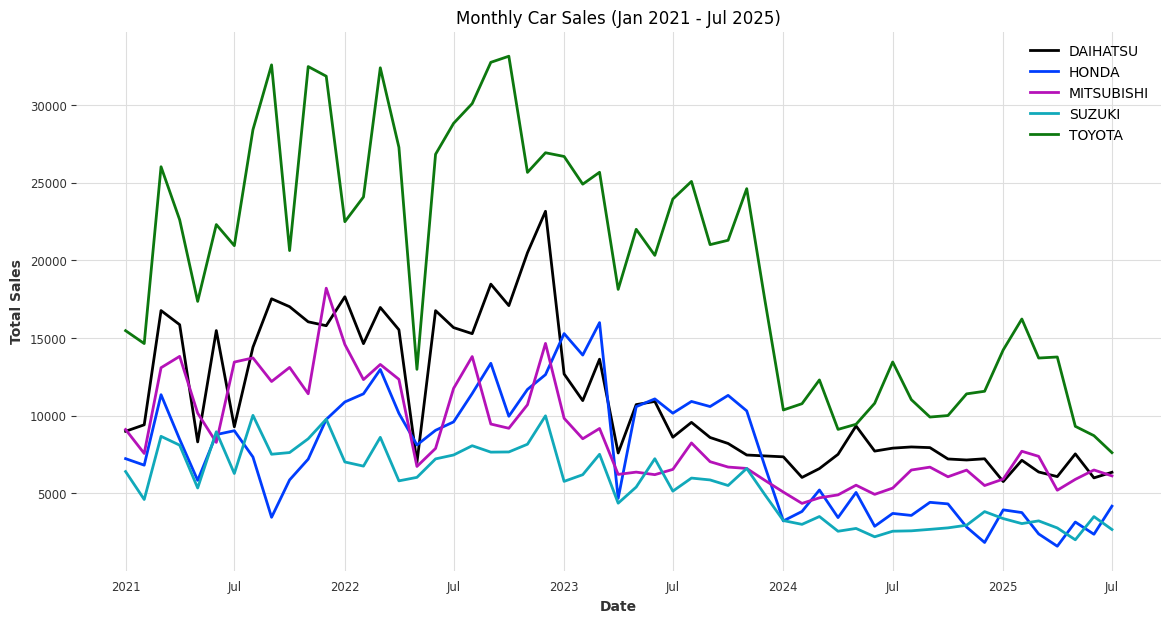

In [24]:
series = TimeSeries.from_dataframe(df, freq='MS')

plt.figure(figsize=(14, 7))
series.plot()
plt.title('Monthly Car Sales (Jan 2021 - Jul 2025)')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

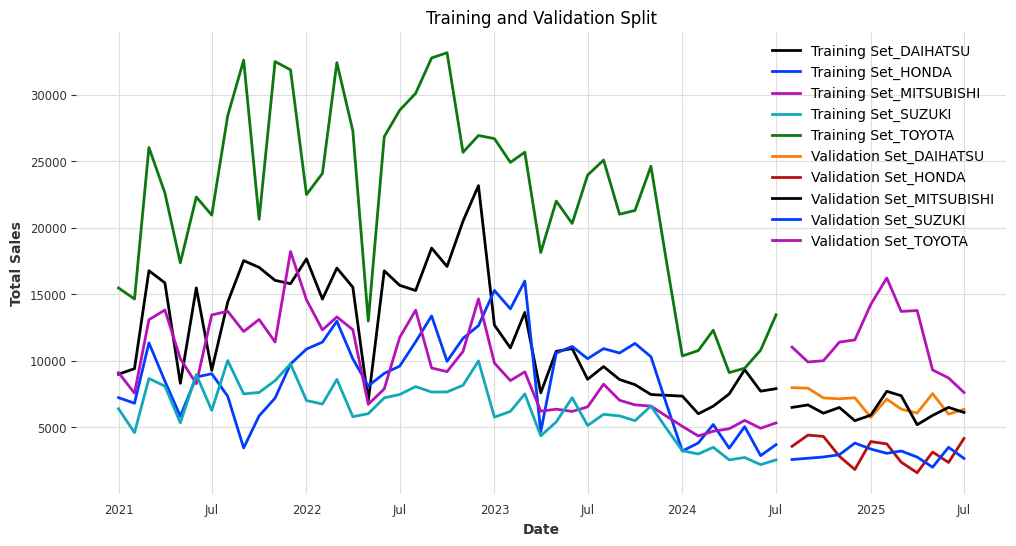

Training set contains data from 2021-01-01 00:00:00 to 2024-07-01 00:00:00.
Validation set contains data from 2024-08-01 00:00:00 to 2025-07-01 00:00:00.


In [25]:
train, val = series.split_before(pd.Timestamp('20240801'))

plt.figure(figsize=(12, 6))
train.plot(label='Training Set')
val.plot(label='Validation Set')
plt.title('Training and Validation Split')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

print(f"Training set contains data from {train.start_time()} to {train.end_time()}.")
print(f"Validation set contains data from {val.start_time()} to {val.end_time()}.")

In [29]:
from darts.models import AutoARIMA

arima_models = {}

for column in train.columns:
    print(f"--- Training AutoARIMA for {column} ---")
    
    model = AutoARIMA(random_state=42)
    model.fit(train[column])
 
    arima_models[column] = model
    
    print(f"✅ Model for {column} trained successfully!\n")

print("\nModel training complete!")

--- Training AutoARIMA for DAIHATSU ---
✅ Model for DAIHATSU trained successfully!

--- Training AutoARIMA for HONDA ---
✅ Model for HONDA trained successfully!

--- Training AutoARIMA for MITSUBISHI ---
✅ Model for MITSUBISHI trained successfully!

--- Training AutoARIMA for SUZUKI ---
✅ Model for SUZUKI trained successfully!

--- Training AutoARIMA for TOYOTA ---
✅ Model for TOYOTA trained successfully!


Model training complete!


Generating predictions for all series...
Prediction complete!


<Axes: xlabel='time'>

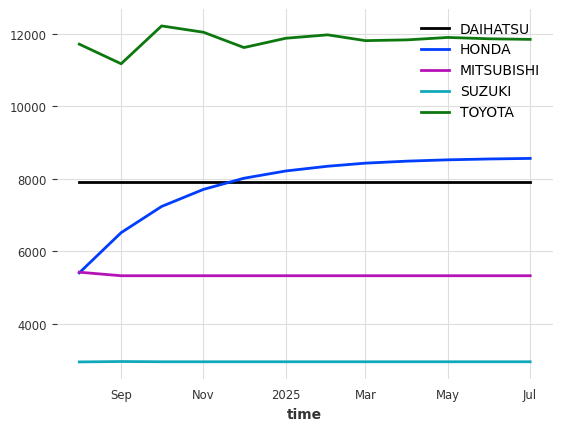

In [30]:
from darts.timeseries import concatenate

forecast_horizon = 12 
all_predictions = []

print("Generating predictions for all series...")
for column, model in arima_models.items():
    prediction = model.predict(n=forecast_horizon)
    all_predictions.append(prediction)

combined_forecast = concatenate(all_predictions, axis = 1)

print("Prediction complete!")
combined_forecast.plot()

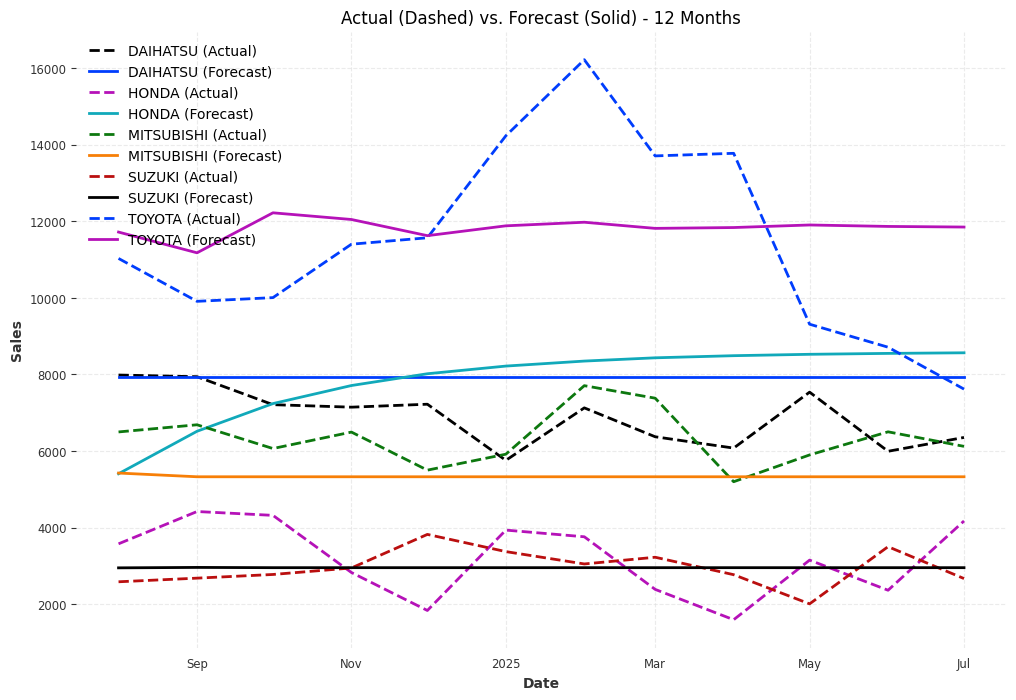

In [36]:
import matplotlib.pyplot as plt

# Set a figure size for the plot
plt.figure(figsize=(12, 8))

# Loop through each column (car brand) in your TimeSeries
for brand in combined_forecast.columns:
    # Plot the actual data (validation) with a dashed line
    val[brand].plot(label=f"{brand} (Actual)", linestyle="--")
    
    # Plot the forecast data with a solid line. 
    # Matplotlib will automatically give it the same color as the line above.
    combined_forecast[brand].plot(label=f"{brand} (Forecast)", linestyle="-")

# Add plot titles and labels for clarity
plt.title("Actual (Dashed) vs. Forecast (Solid) - 12 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(linestyle='--', alpha=0.6) # Optional: adds a light grid
plt.show()